In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('120812.csv', sep = ';', encoding='latin-1')
del df['ds']
df

,y
0,30823
1,30549
2,27918
3,27037
4,22447
5,23458
6,31656
7,29641
8,26990
9,25756


In [15]:
n = 56 # размер выборки
btc = [df.values[i][0] for i in range(len(df) - 2, len(df)-n-1, -1)] # вектор значений биткоина

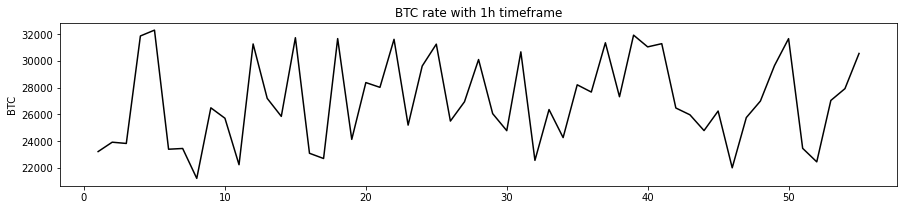

In [4]:
fig = plt.figure(figsize=(15, 3))
plt.plot (np.linspace (1, n-1, n-1), btc, color='black')
plt.title('BTC rate with 1h timeframe')
plt.ylabel('BTC')
plt.show()

In [5]:
X = [(btc[i]-btc[i-1])/btc[i-1] for i in range(len(btc) - 1)] # доходность 

In [6]:
training_sample = np.array(X[:int(len(X)*0.7)]) # разделяем выборку : 90% обучающая и 10% тестовая
test_sample = np.array(X[int(len(X)*0.7):])

In [7]:
m = 10 

def S(a, sample = training_sample):
    Sum = 0
    Length = len(sample)
    for l in range(m, Length):
        x = sample[l-m:l]
        y = sample[l]
        Sum += abs(np.dot(x, a) - y)
    return Sum/Length

In [8]:
bound = Bounds(np.zeros(m), [np.inf for i in range(m)]) # условие неотрицательности - веса >= 0 
lc = LinearConstraint(np.ones(m), [1], [1]) 
a = minimize(S, np.zeros(m), bounds=bound, constraints=lc)

In [9]:
print('Training sample error:', S(a.x, training_sample))
print('Test sample error: ', S(a.x, test_sample))
print('Prediction accuracy: ' + str(round((1-S(a.x, test_sample))*100, 3)) + " %")

Training sample error: 0.09513228799093715
Test sample error:  0.05084069463708846
Prediction accuracy: 94.916 %


In [10]:
Return = np.dot(a.x, X[len(X)-m:])
print("Difference:", Return)
btc_predict = btc[len(btc)-1] + Return
print("Predict:", round(btc_predict, 4))

Difference: 0.05110576737006772
Predict: 30549.0511


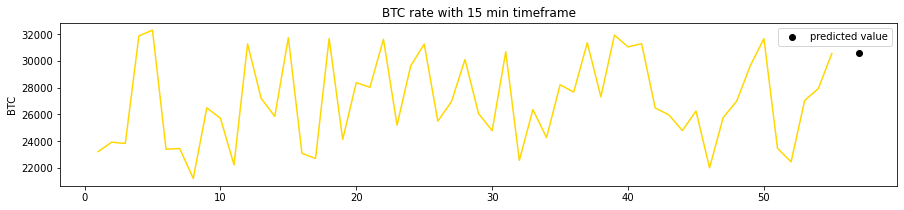

In [11]:
fig = plt.figure(figsize=(15, 3))
plt.plot (np.linspace (1, n-1, n-1), btc, color='gold')
plt.scatter(n+1, btc_predict , color='black', label='predicted value')
plt.title('BTC rate with 15 min timeframe')
plt.ylabel('BTC')
plt.legend()
plt.show()

In [12]:
# посмотрим, что будет, если не вычислять доходность, а просто вычислить значение биткоина на основе изначальной выборки
training_sample_btc = np.array(btc[:int(len(btc)*0.7)])
test_sample_btc = np.array(btc[int(len(btc)*0.7):])
a_btc = minimize(S, np.zeros(m), bounds=bound, constraints=lc)
btc_next = np.dot(a_btc.x, btc[len(btc) - m:]) 

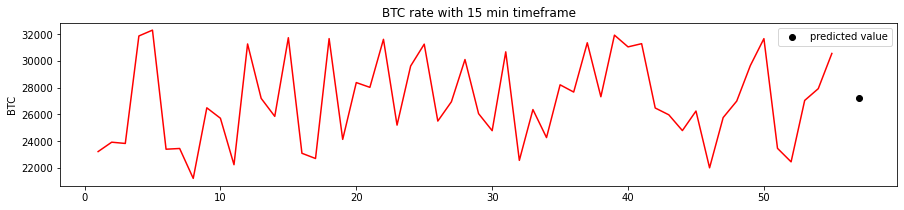

In [13]:
fig = plt.figure(figsize=(15, 3))
plt.plot (np.linspace (1, n-1, n-1), btc, color='red')
plt.scatter(n+1, btc_next , color='black', label='predicted value')
plt.title('BTC rate with 15 min timeframe')
plt.ylabel('BTC')
plt.legend()
plt.show()

In [14]:
print('Difference between 1-st and 2-nd predictions: ' + str(abs(round(btc_next, 4) - btc_predict)))
print('Prediction using yield: ' + str(btc_predict))
print('Prediction using BTC rate: ' + str(btc_next))

Difference between 1-st and 2-nd predictions: 3302.321605767367
Prediction using yield: 30549.05110576737
Prediction using BTC rate: 27246.72951391516
